In [52]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
hotel_cancellations = pd.read_csv('/Users/rahulrajput/Desktop/MSBA/Winter/452 - Machine Learning/Assignment 4/hotel_cancellation.csv')
drinking = pd.read_csv('/Users/rahulrajput/Desktop/MSBA/Winter/452 - Machine Learning/Assignment 4/drinking.csv')
iris = pd.read_csv('/Users/rahulrajput/Desktop/MSBA/Winter/452 - Machine Learning/Assignment 4/iris.csv')

In [5]:
hotel_cancellations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102894 entries, 0 to 102893
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   Unnamed: 0                 102894 non-null  int64
 1   lead_time                  102894 non-null  int64
 2   arrival_date_year          102894 non-null  int64
 3   arrival_date_week_number   102894 non-null  int64
 4   arrival_date_day_of_month  102894 non-null  int64
 5   days_in_waiting_list       102894 non-null  int64
 6   different_room_assigned    102894 non-null  bool 
 7   is_canceled                102894 non-null  bool 
dtypes: bool(2), int64(6)
memory usage: 4.9 MB


In [7]:
hotel_cancellations.isnull().sum()

Unnamed: 0                   0
lead_time                    0
arrival_date_year            0
arrival_date_week_number     0
arrival_date_day_of_month    0
days_in_waiting_list         0
different_room_assigned      0
is_canceled                  0
dtype: int64

## Question 1 - Logistic Regression

In [8]:
hotel_cancellations.head()

,Unnamed: 0,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,days_in_waiting_list,different_room_assigned,is_canceled
0,3,13,2015,27,1,0,False,False
1,4,14,2015,27,1,0,False,False
2,5,14,2015,27,1,0,False,False
3,7,9,2015,27,1,0,False,False
4,8,85,2015,27,1,0,False,True


In [12]:
diff_room_dummy = pd.get_dummies(hotel_cancellations['different_room_assigned'])
canceled_dummy = pd.get_dummies(hotel_cancellations['is_canceled'])

In [45]:
hotel_cancellations['diff_room_assigned'] = diff_room_dummy.iloc[:,1]
hotel_cancellations['canceled_room'] = canceled_dummy.iloc[:,1]

In [47]:
hotel_cancellations

,Unnamed: 0,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,days_in_waiting_list,different_room_assigned,is_canceled,diff_room_assigned,canceled_room
0,3,13,2015,27,1,0,False,False,0,0
1,4,14,2015,27,1,0,False,False,0,0
2,5,14,2015,27,1,0,False,False,0,0
3,7,9,2015,27,1,0,False,False,0,0
4,8,85,2015,27,1,0,False,True,0,1
...,...,...,...,...,...,...,...,...,...,...
102889,119385,23,2017,35,30,0,False,False,0,0
102890,119386,102,2017,35,31,0,False,False,0,0
102891,119387,34,2017,35,31,0,False,False,0,0
102892,119388,109,2017,35,31,0,False,False,0,0


In [53]:
model1a = sm.Logit.from_formula('canceled_room ~ diff_room_assigned', hotel_cancellations).fit()
print(model1a.summary())

Optimization terminated successfully.
         Current function value: 0.631268
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          canceled_room   No. Observations:               102894
Model:                          Logit   Df Residuals:                   102892
Method:                           MLE   Df Model:                            1
Date:                Thu, 09 Feb 2023   Pseudo R-squ.:                 0.05624
Time:                        22:19:35   Log-Likelihood:                -64954.
converged:                       True   LL-Null:                       -68825.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.2744      0.007    -41.152      0.000      -0.287      -0.261
diff_

In [54]:
model1b = sm.Logit.from_formula('canceled_room ~ diff_room_assigned + lead_time + arrival_date_year + arrival_date_week_number + arrival_date_day_of_month + days_in_waiting_list', hotel_cancellations).fit()
print(model1b.summary())

Optimization terminated successfully.
         Current function value: 0.597308
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          canceled_room   No. Observations:               102894
Model:                          Logit   Df Residuals:                   102887
Method:                           MLE   Df Model:                            6
Date:                Thu, 09 Feb 2023   Pseudo R-squ.:                  0.1070
Time:                        22:19:39   Log-Likelihood:                -61459.
converged:                       True   LL-Null:                       -68825.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   356.5464     23.369     15.257      0.000     310.

In Model 1A, the variable 'canceled_room' was only regressed on the variable 'diff_room_assigned' whereas for Model 1B all other covariates were included as well.

Model 1B performed better and had a higher Log Likelihood value as well as a higher Pseudo R-squared value.
The 'diff_room_assigned' variable was significant in both models implying a relation between the two variables.
In Model 1B, the 'Arrival_date_day_of_month' variable came out non-significant.

#### The log(odds) for the variable 'diff_room_assigned' in both cases was roughly similar around -2.6 which means that the prob of someone cancelling a room given they were assigned a different room is significantly lower compared to people who were not assigned a room.

## Question 2 - Double Logistic Regression

In [86]:
#Step 1 for Double Logistic Regression - Logistic Regression with 'diff_room_assigned' as dependent variable and all 
#other covariates as regressors.
y = hotel_cancellations['is_canceled']
x = hotel_cancellations[['lead_time','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','days_in_waiting_list']]
d = hotel_cancellations[['diff_room_assigned']]

model2_step1 = sm.Logit(d,x).fit()
d_hat = np.array(model2_step1.predict(x)).reshape(len(x), 1)

Optimization terminated successfully.
         Current function value: inf
         Iterations 6


/Users/rahulrajput/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/rahulrajput/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [87]:
#Step 2 for Double LASSO - LASSO Logistic regression with 'canceled_room' as dependent variable and 
#'diff_room_assigned', all other covariates as regressors along with 'diff_room_assigned_hat' unpenalised.

x_new = np.hstack((x, d_hat, d))
model2_step2 = sm.Logit(y,x_new).fit()
print(model2_step2.params)

Optimization terminated successfully.
         Current function value: 0.596827
         Iterations 7
x1     0.000658
x2     0.000395
x3     0.005383
x4    -0.004647
x5     0.004968
x6   -11.692611
x7    -2.504256
dtype: float64


#### Since the value of log(odds) is -11.7, The odds of a person canceling given that their room has been changed are very similar to the odds of a person canceling given that their room has not been changed.

## Question 3 - Bootstrapping

In [97]:
# hotel_cancellations is the original sample
# Take 1000 samples of the same size from the original data
# For each 'boot':
#### get d_hat
#### regress y on x,d,d_hat
#### store the coefficient of d

boots = 1000

# Initialize a matrix to store the treatment effect estimates
treatment_effects = np.zeros((boots, model2_step2.params.shape[0]))

i=0
while i < boots:
    # Creating the boots
    resample_index = np.random.choice(hotel_cancellations.index, size = hotel_cancellations.index.size, replace = True)
    resample = hotel_cancellations.iloc[resample_index]
    x_resample = x.iloc[resample_index]
    y_resample = y.iloc[resample_index]
    d_resample = d.iloc[resample_index]
    
    # Running Step 1, regressing d on x
    model2_step1 = sm.Logit(d_resample, x_resample).fit()
    d_hat = np.array(model2_step1.predict(x_resample)).reshape(len(d_hat), 1)
    
    x_new = np.hstack((x_resample, d_hat,d))    
    
    # Running Step 2, regressing y on x,d_hat,d
    model2_step2 = sm.Logit(y_resample, x_new).fit()
    
    treatment_effects[i, :] = model2_step2.params
    i += 1

# Calculate the standard error of the treatment effects
treatment_effects_se = treatment_effects.std(axis=0)

# Print the standard errors of the treatment effect estimates
print('Standard errors of the treatment effects:')
print(treatment_effects_se)    

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.628618
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.627861
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.628277
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.626043
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.627534
         Iterations 5
Optim

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.629659
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.628376
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.628563
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.625494
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.627262
         Iterations 5
Optim

Optimization terminated successfully.
         Current function value: 0.626091
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.626952
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.627789
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.626636
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.628975
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optim

Optimization terminated successfully.
         Current function value: 0.627138
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.625204
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.626104
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.625619
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.629643
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optim

Optimization terminated successfully.
         Current function value: 0.625678
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.625870
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.626714
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.625240
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.628264
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optim

Optimization terminated successfully.
         Current function value: 0.625943
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.626635
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.630199
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.627128
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.629435
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optim

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.627665
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.627154
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.627763
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.627173
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.627277
         Iterations 5
Optim

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.628367
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.624830
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.626865
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.626846
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.626808
         Iterations 5
Optim

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.627932
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.626984
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.628588
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.627084
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.628925
         Iterations 5
Optim

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.626981
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.628963
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.627852
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.627152
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.627060
         Iterations 5
Optim

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.625394
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.627840
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.626747
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.626561
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.627736
         Iterations 5
Optim

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.628361
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.627137
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.629152
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.626567
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.628625
         Iterations 5
Optim

Optimization terminated successfully.
         Current function value: 0.629103
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.628259
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.625684
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.627073
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.628466
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optim

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.628906
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.628676
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.626775
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.626338
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.628032
         Iterations 5
Optim

Optimization terminated successfully.
         Current function value: 0.626735
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.625183
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.627329
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.628777
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.627049
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optim

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.626428
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.626996
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.627604
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.627240
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.626947
         Iterations 5
Optim

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.627968
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.627889
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.626289
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.628352
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.626610
         Iterations 5
Optim

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.628278
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.626302
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.627587
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.627438
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.625982
         Iterations 5
Optim

Optimization terminated successfully.
         Current function value: 0.627883
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.625698
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.626955
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.626055
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.627308
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optim

Optimization terminated successfully.
         Current function value: 0.627192
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.628288
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.627120
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.625110
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.627688
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optim

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.628133
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.625508
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.628860
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.628426
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.626747
         Iterations 5
Optim

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.627036
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.626859
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.627445
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.626043
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.627578
         Iterations 5
Optim

Optimization terminated successfully.
         Current function value: 0.628640
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.628291
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.628494
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.626397
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.627385
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optim

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.624358
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.628932
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.627492
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.627813
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.627874
         Iterations 5
Optim

The standard error for d came out to be 0.02 approximately

## Question 4 - Regression Discontinuity Design

In [99]:
drinking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       50 non-null     float64
 1   others    48 non-null     float64
 2   accident  48 non-null     float64
 3   suicide   48 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [102]:
drinking

,age,others,accident,suicide
0,19.068493,92.825401,35.829327,11.203714
1,19.150684,95.100739,35.639256,12.193368
2,19.232876,92.144295,34.205650,11.715812
3,19.315069,88.427757,32.278957,11.275010
4,19.397261,88.704941,32.650967,10.984314
5,19.479452,90.191788,32.721443,12.166634
6,19.561644,96.220306,36.385197,12.405763
7,19.643835,89.615555,34.187935,10.979514
8,19.726027,93.381699,31.910467,11.900103
9,19.808220,90.857956,30.576832,11.570638


Cutoff threshold - Age = 21

In [121]:
Under_21 = drinking[(drinking['age'] >= 20) & (drinking['age'] < 21)]
Above_21 = drinking[(drinking['age'] >= 21) & (drinking['age'] < 22)]

In [122]:
Under_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 12 to 24
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       13 non-null     float64
 1   others    12 non-null     float64
 2   accident  12 non-null     float64
 3   suicide   12 non-null     float64
dtypes: float64(4)
memory usage: 520.0 bytes


In [123]:
Above_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 25 to 37
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       13 non-null     float64
 1   others    12 non-null     float64
 2   accident  12 non-null     float64
 3   suicide   12 non-null     float64
dtypes: float64(4)
memory usage: 520.0 bytes


Datasets are evenly split.
Bandwidth = +- 1 year

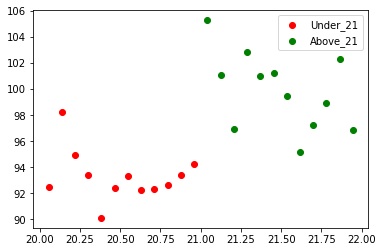

In [156]:
plt.scatter(Under_21['age'], Under_21['others'], color='r', label='Under_21')
plt.scatter(Above_21['age'], Above_21['others'], color='g', label='Above_21') 
plt.legend()
plt.show()

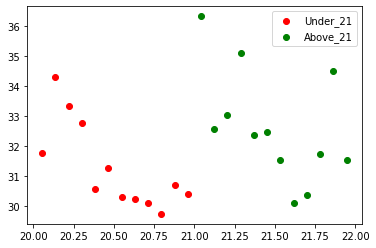

In [157]:
plt.scatter(Under_21['age'], Under_21['accident'], color='r', label='Under_21')
plt.scatter(Above_21['age'], Above_21['accident'], color='g', label='Above_21') 
plt.legend()
plt.show()

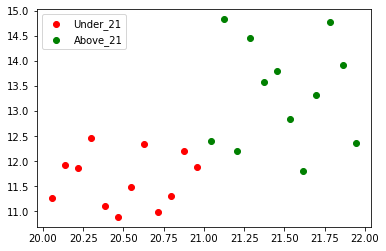

In [158]:
plt.scatter(Under_21['age'], Under_21['suicide'], color='r', label='Under_21')
plt.scatter(Above_21['age'], Above_21['suicide'], color='g', label='Above_21') 
plt.legend()
plt.show()

In [142]:
# Under_21: Mean of others, accident, suicide
# Above_21: Mean of others, accident, suicide

rdd_treatment_effect = pd.DataFrame()

rdd_treatment_effect[0] = [Under_21[['others']].mean(), Under_21[['accident']].mean(), Under_21[['suicide']].mean()]
rdd_treatment_effect[1] = [Above_21[['others']].mean(), Above_21[['accident']].mean(), Above_21[['suicide']].mean()]
rdd_treatment_effect.index = ['Others','Accident','Suicide']
rdd_treatment_effect[2] = rdd_treatment_effect[1] - rdd_treatment_effect[0]
rdd_treatment_effect.columns = ['Under 21','Above 21','Diff']
                                                                 

In [143]:
rdd_treatment_effect

,Under 21,Above 21,Diff
Others,others 93.31885 dtype: float64,others 99.86051 dtype: float64,others 6.54166 dtype: float64
Accident,accident 31.296563 dtype: float64,accident 32.635049 dtype: float64,accident 1.338486 dtype: float64
Suicide,suicide 11.64292 dtype: float64,suicide 13.361998 dtype: float64,suicide 1.719078 dtype: float64


#### The chances of death, for all ways, increase for people of ages between 21 and 22 compared to those just between 20 and 21.

#### Performing 2-Sample t-test on Others Death rate to check whether the difference is statistically significant.

In [144]:
print(np.var(Under_21[['others']]), np.var(Above_21[['others']]))
# Since the ratio of variances is around 2:1, we can go ahead with equal variance assumption

others    3.521509
dtype: float64 others    7.952662
dtype: float64


In [148]:
import scipy.stats as stats
stats.ttest_ind(a=Under_21[['others']].dropna(axis=0).to_numpy(), b=Above_21[['others']].dropna(axis=0).to_numpy(), equal_var=True)

Ttest_indResult(statistic=array([-6.4050666]), pvalue=array([1.91334081e-06]))

#### There is a significant difference between the 'Others' death rates between the two populations

#### Performing 2-Sample t-test on Accidents Death rate to check whether the difference is statistically significant.

In [149]:
print(np.var(Under_21[['accident']]), np.var(Above_21[['accident']]))
# Since the ratio of variances is around 2:1, we can go ahead with equal variance assumption

accident    1.916673
dtype: float64 accident    3.169056
dtype: float64


In [150]:
import scipy.stats as stats
stats.ttest_ind(a=Under_21[['accident']].dropna(axis=0).to_numpy(), b=Above_21[['accident']].dropna(axis=0).to_numpy(), equal_var=True)

Ttest_indResult(statistic=array([-1.96849131]), pvalue=array([0.06173871]))

#### There is a slightly significant difference between the 'Accident' death rates between the two populations

#### Performing 2-Sample t-test on Suicide Death rate to check whether the difference is statistically significant.

In [151]:
print(np.var(Under_21[['suicide']]), np.var(Above_21[['suicide']]))
# Since the ratio of variances is large, we cannot go ahead with equal variance assumption

suicide    0.27185
dtype: float64 suicide    0.982315
dtype: float64


In [152]:
import scipy.stats as stats
stats.ttest_ind(a=Under_21[['others']].dropna(axis=0).to_numpy(), b=Above_21[['others']].dropna(axis=0).to_numpy(), equal_var=False)

Ttest_indResult(statistic=array([-6.4050666]), pvalue=array([3.70385424e-06]))

#### There is a significant difference between the 'Suicide' death rates between the two populations

#### Reducing the bandwidth to +- 0.5 years

#### As we shrink the bandwidth we would expect the differences in death rates between the two age groups to decrease, as people get more similar age wise.

In [162]:
Under_21_new = drinking[(drinking['age'] >= 20.5) & (drinking['age'] < 21)]
Above_21_new = drinking[(drinking['age'] >= 21) & (drinking['age'] < 21.5)]

rdd_treatment_effect_new = pd.DataFrame()

rdd_treatment_effect_new[0] = [Under_21_new[['others']].mean(), Under_21_new[['accident']].mean(), Under_21_new[['suicide']].mean()]
rdd_treatment_effect_new[1] = [Above_21_new[['others']].mean(), Above_21_new[['accident']].mean(), Above_21_new[['suicide']].mean()]
rdd_treatment_effect_new.index = ['Others','Accident','Suicide']
rdd_treatment_effect_new[2] = rdd_treatment_effect_new[1] - rdd_treatment_effect_new[0]
rdd_treatment_effect_new.columns = ['Under 21','Above 21','Diff']

rdd_treatment_effect_new

,Under 21,Above 21,Diff
Others,others 93.040523 dtype: float64,others 101.390777 dtype: float64,others 8.350254 dtype: float64
Accident,accident 30.255221 dtype: float64,accident 33.639288 dtype: float64,accident 3.384067 dtype: float64
Suicide,suicide 11.700047 dtype: float64,suicide 13.548415 dtype: float64,suicide 1.848369 dtype: float64


Interestingly, as we reduced the bandwidth, the average differences between death rates seems to have increased.

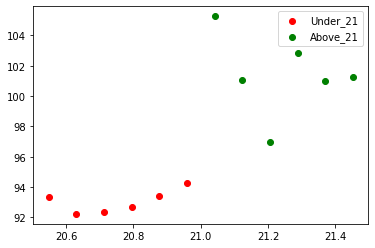

In [183]:
plt.scatter(Under_21_new['age'], Under_21_new['others'], color='r', label='Under_21')
plt.scatter(Above_2_new['age'], Above_21_new['others'], color='g', label='Above_21') 
plt.legend()
plt.show()

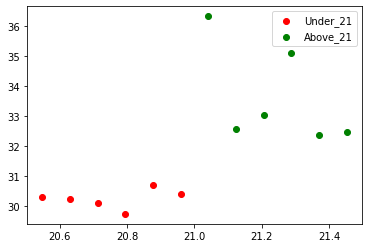

In [184]:
plt.scatter(Under_21_new['age'], Under_21_new['accident'], color='r', label='Under_21')
plt.scatter(Above_21_new['age'], Above_21_new['accident'], color='g', label='Above_21') 
plt.legend()
plt.show()

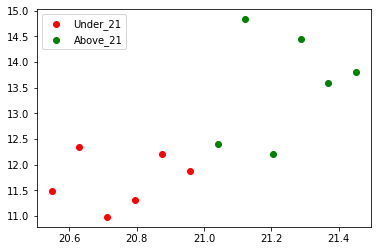

In [185]:
plt.scatter(Under_21_new['age'], Under_21_new['suicide'], color='r', label='Under_21')
plt.scatter(Above_21_new['age'], Above_21_new['suicide'], color='g', label='Above_21') 
plt.legend()
plt.show()

## Question 5 - k Nearest Neighbours

In [163]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [173]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [199]:
import random
keys = [1,3,5,7]
scores = dict.fromkeys(keys)
for k in [1,3,5,7]:
    X = iris.iloc[:, :-1].values
    y = iris.iloc[:, 4].values # type of sepal
    
    # Splitting the dataset into test and train
    random.seed(16743)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculating accuracy of prediction
    accuracy = metrics.accuracy_score(y_test,y_pred)
    scores[k] = accuracy
    print(accuracy)

1.0
1.0
0.9666666666666667
0.9666666666666667


#### The accuracies for all K are quite high, above 90%, and going up to 100%. However, with different train-test splits of data the accuracies for the different K values vary.